In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Đường dẫn tới các file CSV
file_path_template = "C:/Users/ADMIN/Project/ETF_Predict_After_ETF_Project/Python/Code and Chart/EDA/New Table/{}_processed.csv"
file_names = ["ARKB", "BRRR", "BTC", "BTCO", "ETH", "FBTC", "GBTC", "HODL", "IBIT"]

In [ ]:
# Đọc dữ liệu
data_frames = {}
for name in file_names:
    file_path = file_path_template.format(name)
    if os.path.exists(file_path):
        data_frames[name] = pd.read_csv(file_path, parse_dates=['Date'])
    else:
        print(f"Không tìm thấy file {file_path}.")
        continue


In [ ]:
# Định nghĩa điều kiện mua và bán
def loc_tin_hieu_mua(df):
    return df[(df['RSI'] < 40) & (df['Stock RSI'] < 0.35) & (df['Adj Close'] <= 1.15 * df['MA'])]

def loc_tin_hieu_ban(df):
    return df[(df['RSI'] > 70) | (df['Stock RSI'] > 0.75)]

# Áp dụng bộ lọc cho mỗi DataFrame
tin_hieu_mua = {name: loc_tin_hieu_mua(df) for name, df in data_frames.items()}
tin_hieu_ban = {name: loc_tin_hieu_ban(df) for name, df in data_frames.items()}

# Tính phần trăm lợi nhuận
def tinh_loi_nhuan(buy_df, sell_df):
    if buy_df.empty or sell_df.empty:
        return None
    min_buy = buy_df['Adj Close'].min()
    max_sell = sell_df['Adj Close'].max()
    return ((max_sell - min_buy) / min_buy) * 100

loi_nhuan = {name: tinh_loi_nhuan(tin_hieu_mua[name], tin_hieu_ban[name]) for name in data_frames.keys()}


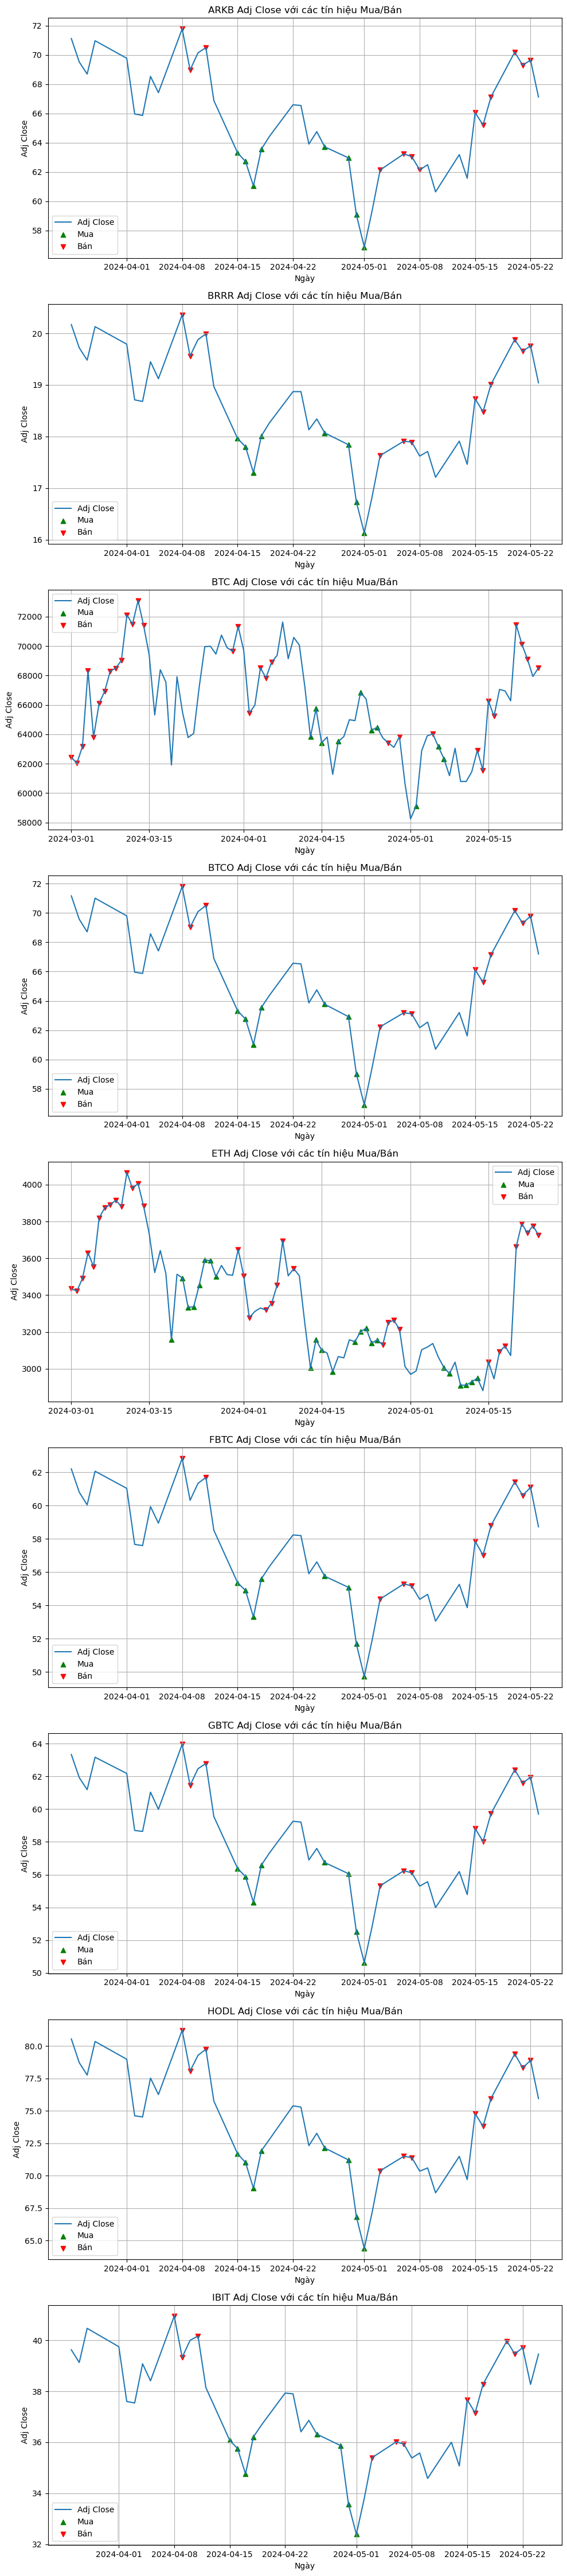

Đã lưu biểu đồ vào C:/Users/ADMIN/Project/ETF_Predict_After_ETF_Project/Python/Code and Chart/Conclusion/bieu_do_tin_hieu_mua_ban.png
Đã lưu bảng lợi nhuận vào C:/Users/ADMIN/Project/ETF_Predict_After_ETF_Project/Python/Code and Chart/Conclusion/loi_nhuan.xlsx
Lợi nhuận của ARKB: 26.24%
Lợi nhuận của BRRR: 26.22%
Lợi nhuận của BTC: 23.61%
Lợi nhuận của BTCO: 26.16%
Lợi nhuận của ETH: 39.75%
Lợi nhuận của FBTC: 26.37%
Lợi nhuận của GBTC: 26.30%
Lợi nhuận của HODL: 26.12%
Lợi nhuận của IBIT: 26.43%


In [13]:


# Vẽ biểu đồ với các tín hiệu mua/bán
fig, axs = plt.subplots(len(data_frames), 1, figsize=(10, 5 * len(data_frames)))
image_save_path = "C:/Users/ADMIN/Project/ETF_Predict_After_ETF_Project/Python/Code and Chart/Conclusion/bieu_do_tin_hieu_mua_ban.png"

for ax, (name, df) in zip(axs, data_frames.items()):
    ax.plot(df['Date'], df['Adj Close'], label='Adj Close')
    buy_dates = tin_hieu_mua[name]['Date']
    sell_dates = tin_hieu_ban[name]['Date']
    ax.scatter(buy_dates, tin_hieu_mua[name]['Adj Close'], marker='^', color='g', label='Mua')
    ax.scatter(sell_dates, tin_hieu_ban[name]['Adj Close'], marker='v', color='r', label='Bán')
    ax.set_title(f"{name} Adj Close với các tín hiệu Mua/Bán")
    ax.set_xlabel("Ngày")
    ax.set_ylabel("Adj Close")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.savefig(image_save_path)
plt.show()

# Lưu bảng lợi nhuận vào file Excel
profit_df = pd.DataFrame(list(loi_nhuan.items()), columns=['Tên ETF', 'Lợi nhuận (%)'])
excel_save_path = "C:/Users/ADMIN/Project/ETF_Predict_After_ETF_Project/Python/Code and Chart/Conclusion/loi_nhuan.xlsx"
profit_df.to_excel(excel_save_path, index=False)

# In thông báo đã lưu thành công
print(f"Đã lưu biểu đồ vào {image_save_path}")
print(f"Đã lưu bảng lợi nhuận vào {excel_save_path}")

# In lợi nhuận ra màn hình
for name, profit in loi_nhuan.items():
    if profit is not None:
        print(f"Lợi nhuận của {name}: {profit:.2f}%")
    else:
        print(f"Không có tín hiệu mua/bán hợp lệ cho {name}.")
